# 8 顧客志向のアプローチ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline


## 8.1 ターゲティング戦略の策定

In [4]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [6]:
df_id_sex_age = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（IDデータ）')
df_id_sex_age = df_id_sex_age.iloc[1:1002, 0:3]
df_id_sex_age.head()

,顧客ID,性別,年代
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40
5,1006,1,60


In [70]:
df81 = pd.merge(df_id_pos, df_id_sex_age, on='顧客ID')
df81['年代'] = df81['年代'].map(lambda e: str(e) + '代')
df81['年代'] = df81['年代'].replace({'10代': 'その他', '90代': 'その他', '100代': 'その他'})
df81['性別'] = df81['性別'].replace({0: 'その他', 1: '男性', 2: '女性'})
df81['性別・年代別'] = df81['性別'].astype('str') + '・' + df81['年代'].astype('str')
df81['性別・年代別'] = df81['性別・年代別'].map(lambda e : 'その他' if 'その他' in e else e)
df81 = df81.groupby(['時間', '性別・年代別']).size().unstack().fillna(0)
df81 = df81.apply(lambda r: r / sum(r), axis=1)
other = df81['その他']
df81 = df81.drop(['その他'], axis=1)
df81['その他'] = other
df81

性別・年代別,女性・20代,女性・30代,女性・40代,女性・50代,女性・60代,女性・70代,女性・80代,男性・20代,男性・30代,男性・40代,男性・50代,男性・60代,男性・70代,男性・80代,その他
時間,,,,,,,,,,,,,,,
8,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.014324,0.102918,0.188859,0.173475,0.186207,0.042440,0.042440,0.000000,0.003183,0.029178,0.026525,0.004775,0.009549,0.000000,0.176127
10,0.012654,0.062669,0.106056,0.143417,0.220548,0.112685,0.044290,0.000000,0.000603,0.021693,0.009039,0.025610,0.025911,0.000000,0.214824
11,0.013951,0.036402,0.158756,0.131174,0.216325,0.116581,0.025818,0.000000,0.007697,0.017960,0.008339,0.037524,0.023412,0.002566,0.203496
12,0.024062,0.063604,0.235066,0.172640,0.107858,0.098940,0.018004,0.003870,0.002692,0.014471,0.013461,0.029615,0.014303,0.030961,0.170453
13,0.026457,0.054506,0.246071,0.121743,0.187786,0.045355,0.000000,0.002387,0.014721,0.009747,0.022678,0.016312,0.039984,0.010344,0.201910
14,0.023333,0.052086,0.181947,0.249588,0.069055,0.102993,0.014612,0.001650,0.010134,0.016733,0.010841,0.006599,0.026632,0.000000,0.233797
15,0.021264,0.042528,0.195787,0.145838,0.147643,0.093681,0.011033,0.000000,0.012036,0.021264,0.018656,0.010231,0.019258,0.001404,0.259378
16,0.011095,0.065255,0.175328,0.207007,0.133577,0.097810,0.018686,0.000292,0.015620,0.011241,0.046423,0.010511,0.006861,0.000000,0.200292


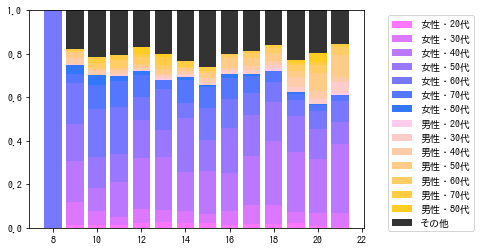

In [101]:
# 時間帯別顧客層
bottom = np.zeros(len(df81.index))
colors = ('#ff77ff', '#dd77ff', '#bb77ff', '#9977ff', '#7777ff', '#5577ff', '#3377ff',
          '#ffccee', '#ffcccc', '#ffccaa', '#ffcc88', '#ffcc66', '#ffcc44', '#ffcc22',
          '#333333')
for i in range(len(df81.columns)):
    plt.bar(df81.index, df81.iloc[:, i], bottom=bottom, label=df81.columns[i], color=colors[i])
    bottom = np.array(bottom) + df81.iloc[:, i]
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))

## 8.2 対応分析による売り場分配策定

In [3]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [5]:
df_id_sex_age = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（IDデータ）')
df_id_sex_age = df_id_sex_age.iloc[1:1002, 0:3]
df_id_sex_age.head()

,顧客ID,性別,年代
1,1002,2,40
2,1003,2,20
3,1004,2,50
4,1005,2,40
5,1006,1,60


In [66]:
df_age_cat = pd.merge(df_id_pos.groupby(['顧客ID', '大カテゴリ名']).size().unstack().fillna(0.0),
                      df_id_sex_age.drop(['性別'], axis=1),
                      on='顧客ID')
df_age_cat = df_age_cat.drop(['顧客ID'], axis=1).groupby(['年代']).sum()
df_age_cat_20_80 = df_age_cat.drop([10, 90, 100])
df_age_cat_20_80 = df_age_cat_20_80.loc[:, ['農産', '水産', '畜産', '穀物類', '惣菜', '即席食品', '加工食品', '菓子', '飲料', '酒類']]
df_age_cat_20_80

,農産,水産,畜産,穀物類,惣菜,即席食品,加工食品,菓子,飲料,酒類
年代,,,,,,,,,,
20,236.0,40.0,123.0,106.0,159.0,68.0,172.0,157.0,185.0,36.0
30,941.0,259.0,502.0,441.0,622.0,282.0,806.0,765.0,561.0,170.0
40,2537.0,831.0,1632.0,1710.0,2088.0,937.0,2481.0,2035.0,1797.0,551.0
50,2142.0,823.0,1222.0,1073.0,2137.0,793.0,1971.0,1566.0,1439.0,400.0
60,2443.0,785.0,990.0,740.0,1268.0,368.0,1793.0,907.0,762.0,303.0
70,1389.0,583.0,550.0,327.0,979.0,239.0,1208.0,491.0,458.0,65.0
80,262.0,86.0,64.0,110.0,217.0,95.0,249.0,188.0,138.0,26.0


In [23]:
! pip install mca

  Running setup.py bdist_wheel for mca ... done
  Stored in directory: /home/ihiroky/.cache/pip/wheels/01/fb/ff/19d72d65c8bb01d4af40c9c2ca20fd267d1969b3b5f8dd60d6
Successfully built mca
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [80]:
import mca
result = mca.MCA(df_age_cat_20_80, ncols=df_age_cat_20_80.shape[1], benzecri=False)
result

In [81]:
# 行スコア
df_row_score = pd.DataFrame(result.fs_r(N=2), index=df_age_cat_20_80.index, columns=['第１軸', '第２軸'])
df_row_score

,0,1
年代,,
20,-0.134340,-0.032421
30,-0.088429,-0.047759
40,-0.124866,-0.028950
50,-0.057180,0.074270
60,0.178414,-0.082274
70,0.262363,0.073937
80,-0.003208,0.109621


In [85]:
# 列スコア
df_col_score = pd.DataFrame(result.fs_c(N=2), index=df_age_cat_20_80.columns, columns=['第１軸', '第２軸'])
df_col_score

,第１軸,第２軸
農産,0.171723,-0.057458
水産,0.232360,0.052131
畜産,-0.018977,-0.056105
穀物類,-0.171027,-0.065834
惣菜,0.021552,0.115771
即席食品,-0.171180,0.078230
加工食品,0.095634,-0.000747
菓子,-0.162328,-0.004977
飲料,-0.163670,0.024499
酒類,-0.181968,-0.129191


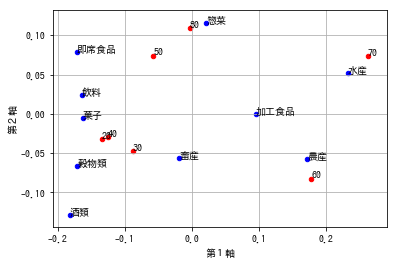

In [95]:
# 対応分析の結果
ax = df_row_score.plot.scatter(x=0, y=1, c='red')
for i, label in enumerate(df_row_score.index.values):
    plt.annotate(label, (df_row_score.iat[i, 0], df_row_score.iat[i, 1]))
df_col_score.plot.scatter(x=0, y=1, c='blue', ax=ax)
for i, label in enumerate(df_col_score.index.values):
    plt.annotate(label, (df_col_score.iat[i, 0], df_col_score.iat[i, 1]))
plt.grid(True)

## 8.4 顧客へのレコメンデーション

In [2]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [6]:
# 購買カテゴリ数と顧客数
df_id_pos15 = df_id_pos[df_id_pos['日'] <= 15]
df_id_pos15p = df_id_pos15[df_id_pos15['大カテゴリ名'] == '加工食品']
df_id_pos15p_count = df_id_pos15p.groupby(['顧客ID'])['小カテゴリ名'].nunique()
df_id_pos15p5 = df_id_pos15p_count[df_id_pos15p_count >= 5]
df_id_pos15p5 = pd.DataFrame(df_id_pos15p5.values, index=df_id_pos15p5.index, columns=['カテゴリ数'])
df_id_pos15p5.groupby(['カテゴリ数']).size()

カテゴリ数
5     73
6     55
7     36
8     36
9     20
10    18
11    18
12    17
13     9
14    11
15     7
16     7
17     3
18     2
19     2
20     1
21     1
22     1
23     2
24     1
dtype: int64

In [79]:
# 協調フィルタリング
all_small_cat = df_id_pos15p['小カテゴリ名'].unique()
df0 = df_id_pos15p.groupby(['顧客ID'])['小カテゴリ名'].unique()
df_mat = pd.DataFrame(index=all_small_cat, columns=df_id_pos15p5.index)
for cid in df_mat.columns:
    vec = []
    cat_set = set(df0.loc[cid])
    for c in all_small_cat:
        vec.append(1 if c in cat_set else 0)
    df_mat[cid] = vec
df_mat.head()

顧客ID,1001,1002,1005,1011,1016,1019,1020,1021,1022,1023,...,1962,1965,1982,1984,1987,1990,1995,1996,1999,2000
豆腐,1,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,0,1
煮豆,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
漬物,1,1,0,1,0,0,1,1,1,1,...,1,1,0,0,0,1,1,0,1,1
麺つゆ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
みりん,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# ユーザー類似度
dot = np.dot(df_mat.T, df_mat)
norm = (df_mat.values * df_mat.values).sum(axis=0, keepdims=True) ** 0.5
user_similarities = dot / (norm * norm.T)
user_similarities

array([[1.        , 0.46291005, 0.28347335, ..., 0.5976143 , 0.40291148,
        0.51887452],
       [0.46291005, 1.        , 0.30618622, ..., 0.38729833, 0.43519414,
        0.40032038],
       [0.28347335, 0.30618622, 1.        , ..., 0.31622777, 0.10660036,
        0.19611614],
       ...,
       [0.5976143 , 0.38729833, 0.31622777, ..., 1.        , 0.13483997,
        0.3721042 ],
       [0.40291148, 0.43519414, 0.10660036, ..., 0.13483997, 1.        ,
        0.3344968 ],
       [0.51887452, 0.40032038, 0.19611614, ..., 0.3721042 , 0.3344968 ,
        1.        ]])

In [124]:
# おすすめスコア
cat_scores = np.dot(df_mat, user_similarities)
df_cat_scores = pd.DataFrame(cat_scores, index=df_mat.index, columns=df_mat.columns)

# 買い上げ済み商品はおすすめしない
for cat in range(df_cat_scores.index.size):
    for cid in range(df_cat_scores.columns.size):
        if df_mat.iloc[cat, cid] == 1:
            df_cat_scores.iloc[cat, cid] = None
df_cat_scores

顧客ID,1001,1002,1005,1011,1016,1019,1020,1021,1022,1023,...,1962,1965,1982,1984,1987,1990,1995,1996,1999,2000
豆腐,NaN,NaN,NaN,52.735418,NaN,NaN,NaN,55.822780,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,74.144404,NaN,55.893025,NaN
煮豆,14.320855,NaN,11.081281,9.454703,12.363043,9.584642,12.010257,9.913343,NaN,15.417070,...,12.281097,NaN,11.249844,13.177827,13.918071,NaN,12.788175,12.535260,10.377060,12.662835
漬物,NaN,NaN,47.992041,NaN,53.580931,39.705514,NaN,NaN,NaN,NaN,...,NaN,NaN,44.274350,58.195618,52.006047,NaN,NaN,56.075029,NaN,NaN
麺つゆ,6.563434,6.500366,5.173347,4.234283,6.086444,4.605159,4.908836,3.628055,6.432437,7.039619,...,5.508736,5.797669,4.485497,6.279149,5.665036,6.882518,5.116509,6.956279,3.942485,4.977025
みりん,0.586494,0.624744,0.369333,0.380040,0.901742,0.720636,1.028827,0.832322,0.919976,0.704598,...,1.044506,0.800821,0.805415,1.003882,1.020751,1.269116,0.631522,0.331645,1.123211,0.423734
スープベース,0.377964,0.408248,0.625000,0.375000,0.731654,0.327145,0.299974,0.474342,0.478980,0.505754,...,0.361690,0.433762,0.250000,0.543749,0.410118,0.643372,0.375000,0.316228,0.327161,0.294174
料理酒,2.913226,2.498169,1.898337,1.439381,2.445328,1.990216,2.313506,1.720357,2.366241,3.121763,...,2.530860,2.118148,1.936659,2.561860,2.372168,3.168550,2.507278,2.197401,1.693286,1.944741
油揚げ,NaN,NaN,NaN,33.641318,NaN,37.165930,NaN,NaN,NaN,NaN,...,43.639913,46.974872,NaN,NaN,NaN,NaN,NaN,48.423040,NaN,43.683446
ヨーグルト,51.413944,51.905399,40.428448,31.572556,45.438970,NaN,NaN,31.324297,NaN,NaN,...,NaN,NaN,36.939220,NaN,NaN,NaN,44.777194,47.454716,33.802084,40.365534
梅干,10.265843,9.981923,8.592119,5.626393,9.519958,7.668113,8.460429,7.384879,NaN,10.862825,...,9.557184,8.501589,7.584667,10.101241,8.781170,11.216390,8.173873,8.829081,6.739035,8.456623


In [108]:
# 買い上げ率
df_buy_rate = (df_mat.sum(axis=1) / df_mat.columns.size).sort_values(ascending=False)
df_buy_rate[:20]

豆腐        0.750000
漬物        0.571875
納豆        0.546875
油揚げ       0.496875
ヨーグルト     0.465625
チーズ       0.309375
中華調味料     0.296875
おでん種      0.231250
ちくわ       0.221875
佃煮        0.218750
ドレッシング    0.200000
カレールー     0.187500
カニカマ      0.181250
こんにゃく     0.137500
煮豆        0.131250
和風調味料     0.125000
ふりかけ      0.121875
味噌        0.121875
中華だし      0.115625
その他調味料    0.112500
dtype: float64

In [129]:
# おすすめスコアランキング？
df_cat_scores.sum(axis=1).sort_values(ascending=False)[:20]

ヨーグルト     6497.306022
油揚げ       6402.845273
納豆        6234.739679
漬物        6057.786544
中華調味料     5808.977175
チーズ       5735.156709
ちくわ       5015.338282
おでん種      4920.747953
佃煮        4640.200361
ドレッシング    4457.985358
カレールー     4331.796355
カニカマ      4282.209664
豆腐        3982.120663
こんにゃく     3284.891114
煮豆        3227.726738
味噌        2986.671774
和風調味料     2865.035014
かまぼこ      2797.250396
その他調味料    2778.145774
中華だし      2759.051524
dtype: float64

## 8.4 潜在クラス分析による顧客の多様性の評価

In [3]:
df_id_pos = pd.read_excel('978-4-274-22101-9.xlsx', 'ID付きPOSデータ（POSデータ）')
df_id_pos.head()

,レシートNo,日,時間,顧客ID,税抜価格,税抜単価,個数,大カテゴリ番号,大カテゴリ名,中カテゴリ番号,中カテゴリ名,小カテゴリ番号,小カテゴリ名
0,1,1,9,1518,50,10,5,11,農産,1113,野菜,111327,じゃが芋
1,1,1,9,1518,50,10,5,11,農産,1113,野菜,111363,玉葱
2,1,1,9,1518,90,90,1,11,農産,1113,野菜,111361,レタス
3,1,1,9,1518,185,185,1,11,農産,1113,野菜,111339,トマト
4,2,1,9,1532,85,85,1,11,農産,1113,野菜,111318,キャベツ


In [4]:
docs = df_id_pos.groupby(['レシートNo'])['大カテゴリ名'].apply(list)
docs[:5]

レシートNo
1                                     [農産, 農産, 農産, 農産]
2                                                 [農産]
3    [農産, 飲料, 農産, 農産, 穀物類, 即席食品, 惣菜, 惣菜, 惣菜, 穀物類, 惣...
4       [農産, 農産, 加工食品, 畜産, 菓子, 飲料, 菓子, 水産, 畜産, 農産, 飲料]
5    [菓子, 飲料, 菓子, 惣菜, 加工食品, 惣菜, 惣菜, 菓子, 水産, 穀物類, 加工...
Name: 大カテゴリ名, dtype: object

In [5]:
from gensim import corpora
from gensim import models
from pprint import pprint

# 単語->id変換の辞書作成
dictionary = corpora.Dictionary(docs)
print('===単語->idの変換辞書===')
pprint(dictionary.token2id)

# textsをcorpus化
corpus = list(map(dictionary.doc2bow, docs))
print('===corpus化されたdocs===')
pprint(corpus)

# tfidf modelの生成
test_model = models.TfidfModel(corpus)

# corpusへのモデル適用
corpus_tfidf = test_model[corpus]

# 表示
print('===結果表示===')
for doc in corpus_tfidf:
    print(doc)

===単語->idの変換辞書===
{'その他': 11,
 '乾物類': 10,
 '加工食品': 8,
 '即席食品': 1,
 '惣菜': 2,
 '水産': 3,
 '畜産': 4,
 '穀物類': 5,
 '菓子': 9,
 '農産': 0,
 '酒類': 6,
 '飲料': 7}
===corpus化されたdocs===
[[(0, 4)],
 [(0, 1)],
 [(0, 4), (1, 3), (2, 4), (3, 1), (4, 3), (5, 3), (6, 1), (7, 3)],
 [(0, 3), (3, 1), (4, 2), (7, 2), (8, 1), (9, 2)],
 [(0, 1), (2, 4), (3, 1), (5, 1), (7, 1), (8, 2), (9, 3)],
 [(0, 4), (9, 5)],
 [(0, 3), (7, 1), (9, 4)],
 [(0, 5), (8, 1), (9, 2)],
 [(0, 6), (2, 1), (4, 2), (5, 2), (7, 1), (8, 1)],
 [(4, 1), (5, 1), (7, 1), (8, 3)],
 [(2, 3), (5, 3), (7, 3)],
 [(0, 4), (2, 1), (8, 1)],
 [(0, 5), (3, 1), (7, 3), (8, 2), (10, 1)],
 [(0, 2), (4, 1), (5, 1), (8, 1)],
 [(2, 1), (7, 3), (9, 2)],
 [(0, 5), (1, 3), (2, 2), (3, 2), (5, 4), (7, 4), (8, 11), (9, 13)],
 [(2, 1), (7, 1), (9, 4)],
 [(2, 3), (5, 4), (8, 3), (9, 1)],
 [(2, 3), (6, 1), (7, 1)],
 [(2, 2), (3, 1), (4, 1), (5, 1), (7, 2)],
 [(0, 1), (3, 2), (4, 2), (6, 1), (7, 1)],
 [(1, 1), (2, 5), (8, 1)],
 [(0, 5), (4, 3), (7, 1), (8, 1)],
 [(0, 1)

 [(1, 1), (2, 6), (3, 2), (4, 3), (5, 1), (7, 2), (8, 3)],
 [(0, 3), (2, 1), (4, 2), (5, 2), (7, 2), (8, 1), (10, 1)],
 [(0, 2), (2, 2), (4, 3), (9, 1)],
 [(0, 4), (3, 1), (4, 2), (8, 3)],
 [(0, 4), (2, 2), (3, 1), (4, 3), (5, 1), (7, 1), (8, 5)],
 [(0, 1), (1, 1), (2, 2), (4, 1), (5, 1), (9, 1)],
 [(1, 1), (2, 1), (5, 1), (7, 1)],
 [(0, 2), (1, 2), (3, 1), (5, 3), (8, 3), (9, 1)],
 [(0, 2), (5, 1), (7, 1), (8, 3)],
 [(0, 2), (1, 1), (2, 1), (4, 1), (5, 1), (8, 1)],
 [(5, 1), (8, 5), (9, 1)],
 [(0, 3), (1, 1), (4, 2), (7, 2), (8, 4), (9, 2)],
 [(5, 1), (6, 1), (7, 1)],
 [(0, 2), (1, 3), (4, 1), (7, 1), (8, 1)],
 [(0, 3), (4, 1), (8, 4), (9, 2)],
 [(0, 1), (3, 1), (4, 2), (8, 1)],
 [(3, 1), (4, 1), (5, 1), (8, 3), (9, 1)],
 [(6, 2), (7, 1)],
 [(0, 4), (3, 2), (4, 2), (8, 2)],
 [(0, 1), (4, 2), (5, 2), (8, 2)],
 [(2, 1), (3, 1), (7, 1), (8, 4), (9, 3)],
 [(0, 2), (4, 1), (6, 1), (7, 1), (9, 2)],
 [(2, 1), (3, 1), (4, 3), (5, 2), (8, 2), (10, 1)],
 [(1, 2), (2, 2), (5, 2), (7, 1), (9, 1)]

 [(0, 1), (1, 1), (2, 3), (4, 2), (5, 1), (7, 1), (8, 3)],
 [(0, 7), (4, 5), (5, 1), (6, 1), (7, 1), (8, 4), (9, 1)],
 [(2, 2), (9, 1)],
 [(0, 2), (4, 1), (6, 1), (9, 2)],
 [(0, 1), (1, 1), (8, 1)],
 [(0, 3), (2, 2), (3, 3), (4, 1), (7, 1), (9, 7)],
 [(0, 1), (5, 1)],
 [(0, 7), (3, 5), (6, 1), (8, 2)],
 [(0, 7), (3, 3), (5, 1), (6, 1), (8, 5), (10, 1)],
 [(4, 4), (5, 1), (7, 1), (9, 14)],
 [(1, 1), (2, 4), (3, 4), (8, 2), (9, 6)],
 [(0, 1), (3, 2), (8, 6), (9, 2), (10, 1)],
 [(0, 4), (4, 1), (5, 3), (7, 1), (8, 2), (9, 4)],
 [(0, 4), (2, 1), (3, 1), (4, 1), (5, 2), (8, 1)],
 [(2, 1), (6, 3), (7, 2), (8, 2)],
 [(0, 1), (7, 1), (8, 1)],
 [(2, 1), (9, 2)],
 [(2, 3)],
 [(0, 1), (2, 1), (4, 2), (6, 1), (7, 1), (8, 1), (9, 3)],
 [(0, 2), (2, 2), (3, 1), (4, 1), (6, 1), (7, 2), (8, 3), (9, 2)],
 [(0, 1), (1, 1), (3, 2), (4, 3), (5, 1), (6, 1), (9, 7), (10, 1)],
 [(1, 1), (6, 2), (7, 1), (8, 3), (9, 4)],
 [(0, 2), (2, 5), (6, 1), (7, 1), (8, 1), (9, 1)],
 [(5, 1), (7, 2), (8, 2), (9, 4)],
 [(0

 [(0, 1), (2, 1), (5, 1), (7, 1), (8, 1), (9, 1)],
 [(0, 1), (4, 2), (5, 1), (6, 1), (7, 3), (8, 3)],
 [(0, 2), (2, 1), (4, 2), (5, 2), (8, 1)],
 [(1, 1), (7, 2), (8, 1)],
 [(2, 2), (5, 1), (7, 2)],
 [(1, 1), (2, 5), (3, 2), (4, 2), (6, 1), (7, 2), (8, 2), (9, 1)],
 [(0, 1), (7, 1), (9, 1)],
 [(1, 3), (2, 4), (7, 6), (8, 2), (9, 3)],
 [(3, 1), (6, 2), (7, 1), (9, 1)],
 [(0, 9), (4, 3), (7, 2), (8, 2), (9, 1)],
 [(4, 1), (8, 2), (9, 1)],
 [(0, 3), (2, 1), (3, 1), (4, 2), (5, 4), (7, 2), (8, 3), (9, 1)],
 [(2, 2), (4, 1)],
 [(2, 2), (6, 1), (7, 1)],
 [(2, 2), (5, 1), (8, 1), (9, 2)],
 [(0, 1), (4, 1), (5, 1)],
 [(8, 1), (9, 2)],
 [(0, 2), (3, 1), (5, 3), (7, 2), (9, 1)],
 [(0, 2), (4, 2), (7, 1), (8, 3), (9, 1)],
 [(0, 4), (4, 3), (5, 2), (8, 1), (9, 1)],
 [(0, 3), (2, 1), (4, 1)],
 [(3, 2), (4, 3), (9, 1)],
 [(0, 2), (2, 1), (3, 1), (5, 1), (7, 1), (9, 1)],
 [(0, 4), (3, 1), (8, 2)],
 [(0, 2), (2, 1), (3, 1), (4, 1), (5, 2), (7, 1), (8, 1)],
 [(0, 1), (2, 1), (4, 1), (5, 2), (7, 1), (8,

 [(0, 1), (2, 1), (5, 2), (6, 1), (9, 5)],
 [(0, 3), (1, 1), (4, 1), (7, 1), (8, 1), (9, 1)],
 [(0, 1), (3, 1), (5, 1), (7, 2), (8, 1)],
 [(3, 1), (5, 1), (7, 2), (8, 1)],
 [(1, 1), (2, 2), (5, 1), (6, 1), (8, 2), (9, 2)],
 [(2, 3), (4, 1), (5, 5), (7, 4), (9, 2)],
 [(0, 2), (2, 3), (3, 3), (6, 1), (9, 2)],
 [(0, 8), (4, 1), (5, 1), (7, 2), (8, 4), (9, 4), (10, 1)],
 [(2, 6), (5, 2), (7, 1), (8, 2), (9, 2)],
 [(0, 4), (3, 2), (4, 2), (5, 1), (6, 3), (8, 2)],
 [(0, 5), (4, 3), (5, 1), (9, 1)],
 [(0, 2), (4, 1), (10, 3)],
 [(0, 1), (5, 1), (7, 1)],
 [(8, 1), (9, 10)],
 [(0, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 3), (8, 2), (9, 3)],
 [(0, 6), (3, 4), (4, 1), (9, 3)],
 [(7, 2), (8, 1)],
 [(0, 2), (3, 1)],
 [(1, 2), (2, 1), (4, 1), (5, 1), (8, 2)],
 [(2, 2), (8, 2)],
 [(1, 1), (2, 1), (3, 1), (7, 3), (8, 3)],
 [(0, 3), (6, 1), (9, 1)],
 [(2, 2)],
 [(2, 1)],
 [(0, 1), (2, 1), (3, 1), (5, 1), (7, 2), (8, 4), (9, 1)],
 [(0, 1), (1, 1), (2, 1)],
 [(2, 4), (3, 1), (7, 1), (8, 3)],
 [(0

 [(0, 4), (4, 2), (5, 1), (8, 1), (9, 3), (10, 1)],
 [(0, 11), (2, 3), (3, 1), (4, 2), (5, 1), (7, 2), (8, 3), (9, 1)],
 [(0, 1), (3, 3), (5, 2), (7, 1), (8, 3), (9, 3)],
 [(0, 7), (2, 3), (4, 1), (5, 2), (6, 1), (7, 3), (9, 3), (10, 2)],
 [(2, 2), (7, 2), (9, 1)],
 [(0, 6), (2, 5), (4, 2), (5, 5), (7, 6), (8, 13), (9, 9), (10, 1)],
 [(3, 2), (7, 1), (8, 1)],
 [(7, 1), (9, 1)],
 [(0, 1), (5, 1), (8, 1)],
 [(1, 2), (3, 1), (7, 2), (8, 2), (9, 3)],
 [(0, 2), (3, 4), (8, 1)],
 [(2, 2), (7, 1)],
 [(5, 1), (7, 1)],
 [(7, 1), (8, 1), (9, 4)],
 [(0, 4), (4, 2), (5, 1), (6, 2), (7, 1), (8, 4), (9, 1)],
 [(0, 1), (8, 4), (9, 2)],
 [(0, 1), (6, 1), (9, 5)],
 [(1, 3), (5, 2), (9, 3)],
 [(0, 1), (1, 1), (3, 2), (8, 1)],
 [(0, 2), (2, 1), (3, 1), (4, 1), (5, 1), (8, 3), (9, 1), (10, 1)],
 [(1, 1), (2, 4), (3, 1), (4, 2), (6, 2), (7, 3), (8, 4), (9, 1)],
 [(2, 1), (3, 1), (10, 2)],
 [(0, 7), (2, 8), (4, 4), (6, 1), (7, 3), (8, 3)],
 [(4, 1), (5, 1), (9, 6)],
 [(0, 4), (2, 2), (3, 3), (4, 1), (8, 1),

[(0, 0.3708362874340735), (2, 0.15545508198773525), (3, 0.5273461412414595), (4, 0.3749461991289495), (5, 0.21141648943099112), (7, 0.3692915287199803), (8, 0.4884284955806039)]
[(2, 0.27078065699026077), (4, 0.326551492681816), (6, 0.7994299702403823), (8, 0.42538650790623594)]
[(2, 0.24196444348236112), (4, 0.2918002012157458), (5, 0.6581357464042273), (8, 0.5701759357250145), (9, 0.3131494727534699)]
[(0, 0.06701025794568116), (2, 0.42136188512095435), (3, 0.14293747193307796), (7, 0.8007734335140052), (8, 0.06619441095559428), (10, 0.38976002148909833)]
[(2, 0.2615253778933996), (3, 0.44358279287286223), (6, 0.7721054649555152), (7, 0.3106334812809263), (8, 0.20542340148567795)]
[(0, 0.5954469289069889), (3, 0.4233763670296178), (4, 0.45153461987529747), (7, 0.44472489768164514), (8, 0.19606579610674907), (9, 0.16152356710147683)]
[(0, 0.19425656952709178), (1, 0.578553369777882), (2, 0.36644679565066746), (7, 0.2901710591252973), (8, 0.09594575210054862), (9, 0.6323387530205188)]


[(2, 1.0)]
[(0, 0.213874235847561), (2, 0.5379382438347414), (3, 0.2281042001692484), (4, 0.16218342407410927), (5, 0.18289690756328295), (6, 0.39704087345079303), (7, 0.4792124690036177), (8, 0.21127032628322523), (9, 0.34809882602246256)]
[(0, 0.4520374511210177), (1, 0.44876696019178164), (2, 0.09474736077174943), (3, 0.1607044763571528), (4, 0.3427854755015622), (5, 0.3865648033068853), (7, 0.22507722008305495), (8, 0.2232669573595673), (10, 0.43820685584591745)]
[(0, 0.6092786234938514), (4, 0.46202336144790834), (5, 0.5210313231036614), (6, 0.28276958639762967), (7, 0.11376386388888483), (8, 0.22569775598407174)]
[(7, 1.0)]
[(0, 0.21431145727483794), (4, 0.6500598975169504), (8, 0.21170222455854934), (9, 0.6976208834588805)]
[(0, 0.470828364308107), (2, 0.5921156946272155), (8, 0.4650960493514973), (9, 0.45978834306310135)]
[(2, 0.3192910266904902), (5, 0.868461643152278), (7, 0.37924611355711696)]
[(0, 0.40895808584873006), (2, 0.2571536885119303), (3, 0.43616781004777205), (6, 

[(3, 0.9438167099639568), (7, 0.3304693904022158)]
[(1, 0.8366287982960798), (2, 0.529907798138604), (8, 0.13874429477839387)]
[(0, 0.17425629867402245), (1, 0.8649777718226794), (2, 0.07304848019239561), (4, 0.44046887451460065), (5, 0.09934479492773358), (8, 0.057378245259997754), (9, 0.0945390683377764)]
[(0, 0.06875263376513373), (2, 0.4323179802380456), (5, 0.1175891434762296), (7, 0.20539871167137252), (9, 0.33570258247449813), (10, 0.7997888333888352)]
[(0, 0.6207519289049552), (5, 0.35389523103219206), (8, 0.6131943010385135), (9, 0.33677582660775685)]
[(0, 0.10530277997121523), (1, 0.6272454861901474), (2, 0.06621460540133323), (4, 0.23955712130413181), (5, 0.2701524950618083), (7, 0.31459238951323326), (8, 0.31206216954864263), (9, 0.514168159707766)]
[(0, 0.20829142792183655), (1, 0.31017665918170884), (2, 0.26194815962303575), (4, 0.3158998263795244), (5, 0.17812270789828658), (8, 0.5143887220058903), (9, 0.1695061615130969), (10, 0.6057555508040118)]
[(0, 0.903594626179185

[(0, 0.3567576522635063), (1, 0.5312647660091403), (3, 0.3804942591674676), (4, 0.2705336497378569), (5, 0.3050852342730952), (8, 0.5286212149330838)]
[(0, 0.07807693303517224), (1, 0.46507227857867756), (2, 0.5891392398130536), (4, 0.11841336840473464), (7, 0.4665101706928103), (8, 0.23137904926460753), (9, 0.3812308942393983)]
[(0, 0.4548382418456311), (4, 0.6898186980777797), (7, 0.33970767292024145), (8, 0.4493006059379024)]
[(0, 0.25443867637375417), (2, 0.3199831297812077), (3, 0.271367565786299), (4, 0.5788317922583971), (8, 0.5026817930035216), (9, 0.41412096314182184)]
[(5, 0.7531831188549917), (7, 0.6578109070788256)]
[(4, 0.5926806212205924), (5, 0.16709391451804434), (6, 0.7254700437797347), (7, 0.2918711179920334), (8, 0.09650788061562486)]
[(3, 0.4158105012691254), (6, 0.9047058564211532), (8, 0.04814051002235926), (9, 0.07931854566476523)]
[(0, 0.11811515931438381), (2, 0.14854211195669112), (3, 0.25194772840684), (4, 0.7165452499409745), (8, 0.23335422472420794), (9, 0.

[(4, 0.2767005527526137), (5, 0.3120397519562729), (8, 0.18022376946512414), (9, 0.8908352205796802)]
[(1, 0.9499898319678572), (2, 0.2674261916860267), (4, 0.1612530655770335)]
[(0, 0.38975433409368704), (4, 0.5911108666318526), (5, 0.44440361338289985), (7, 0.19406538510377536), (8, 0.5133454559277527)]
[(0, 0.29820514538084353), (3, 0.21203066965620668), (4, 0.3015100992270628), (5, 0.6800357689147061), (7, 0.4454444093315708), (8, 0.09819150354767693), (9, 0.32356978579665985)]
[(2, 0.9297773721922435), (7, 0.3681223141284516)]
[(2, 0.3926615094992102), (4, 0.47353530887649053), (5, 0.5340135350451028), (7, 0.2331968940132475), (8, 0.1542142173038121), (9, 0.5081810488375456)]
[(0, 0.39491160891353183), (4, 0.19964417152724112), (6, 0.4887484445162224), (8, 0.39010357716794986), (9, 0.6427528163954396)]
[(0, 0.39071438342165943), (1, 0.5818313473248141), (3, 0.416710276353911), (8, 0.578936179072159)]
[(0, 0.3597126542959892), (2, 0.3619008952065408), (4, 0.21821957086253754), (5, 

[(2, 0.5871520255069103), (7, 0.2789619564931132), (9, 0.7598899431974783)]
[(2, 0.5477263397228165), (6, 0.80853052121857), (8, 0.21511451143954288)]
[(0, 0.7199640846024542), (2, 0.30180993498376707), (3, 0.5119109088198939), (7, 0.358482498120668)]
[(0, 0.1503522278580921), (2, 0.47270895609575897), (3, 0.3207116045869047), (4, 0.11401391586304124), (6, 0.27911720940804624), (7, 0.33688331858459564), (8, 0.6683476319622365)]
[(5, 0.6121764255918246), (7, 0.5346592611143763), (9, 0.5825628708167441)]
[(0, 0.20127812625069483), (1, 0.5994656370613858), (2, 0.5062564049782011), (3, 0.21467001772342428), (6, 0.3736571763140035), (8, 0.3976551475510082)]
[(2, 0.3723163105671498), (3, 0.3157496802104122), (4, 0.2244998743943927), (5, 0.7595165722296775), (7, 0.22111412785394388), (8, 0.2924476529252049)]
[(0, 0.589956840612208), (1, 0.2928442514545209), (2, 0.3709660791066748), (4, 0.29824761294024615), (8, 0.582774141612828)]
[(0, 0.677697460805261), (9, 0.7353408404393854)]
[(0, 0.59637

In [45]:
# https://radimrehurek.com/gensim/models/lsimodel.html
id2word = dict([(v, k) for k, v in dictionary.token2id.items()])
print(id2word)
model = models.LsiModel(corpus=corpus_tfidf, id2word=id2word, num_topics=3)

{0: '農産', 1: '即席食品', 2: '惣菜', 3: '水産', 4: '畜産', 5: '穀物類', 6: '酒類', 7: '飲料', 8: '加工食品', 9: '菓子', 10: '乾物類', 11: 'その他'}


In [50]:
# 左特異ベクトル
model.projection.u

array([[ 4.06259291e-01, -4.16907671e-01,  2.01721446e-01],
       [ 2.22494182e-01,  7.16135860e-02, -6.84302068e-02],
       [ 3.92822777e-01,  7.70118333e-01,  4.23633305e-01],
       [ 2.74246536e-01, -2.41332245e-01,  2.77781374e-01],
       [ 3.18374808e-01, -2.74578088e-01,  1.12769806e-01],
       [ 2.97584425e-01, -4.46232274e-02, -1.23778700e-01],
       [ 1.46919380e-01,  8.72492883e-02,  6.18253370e-02],
       [ 3.07130989e-01,  1.25886515e-01, -2.31623522e-01],
       [ 3.49621538e-01, -2.23397683e-01,  8.17127528e-02],
       [ 3.53326104e-01,  1.31904687e-01, -7.78328065e-01],
       [ 5.47889050e-02, -3.98294214e-02,  2.14813359e-03],
       [ 4.32367305e-03,  1.53340806e-04, -3.45074213e-03]])

In [51]:
# 特異値
model.projection.s

array([50.47879302, 27.01919113, 24.66748372])

In [53]:
# 右特異ベクトル
model[corpus_tfidf]

In [60]:
topics = model.get_topics()
topics 

array([[ 4.06259291e-01,  2.22494182e-01,  3.92822777e-01,
         2.74246536e-01,  3.18374808e-01,  2.97584425e-01,
         1.46919380e-01,  3.07130989e-01,  3.49621538e-01,
         3.53326104e-01,  5.47889050e-02,  4.32367305e-03],
       [-4.16907671e-01,  7.16135860e-02,  7.70118333e-01,
        -2.41332245e-01, -2.74578088e-01, -4.46232274e-02,
         8.72492883e-02,  1.25886515e-01, -2.23397683e-01,
         1.31904687e-01, -3.98294214e-02,  1.53340806e-04],
       [ 2.01721446e-01, -6.84302068e-02,  4.23633305e-01,
         2.77781374e-01,  1.12769806e-01, -1.23778700e-01,
         6.18253370e-02, -2.31623522e-01,  8.17127528e-02,
        -7.78328065e-01,  2.14813359e-03, -3.45074213e-03]])

In [62]:
model.show_topics(num_words=12)

[(0,
  '0.406*"農産" + 0.393*"惣菜" + 0.353*"菓子" + 0.350*"加工食品" + 0.318*"畜産" + 0.307*"飲料" + 0.298*"穀物類" + 0.274*"水産" + 0.222*"即席食品" + 0.147*"酒類" + 0.055*"乾物類" + 0.004*"その他"'),
 (1,
  '0.770*"惣菜" + -0.417*"農産" + -0.275*"畜産" + -0.241*"水産" + -0.223*"加工食品" + 0.132*"菓子" + 0.126*"飲料" + 0.087*"酒類" + 0.072*"即席食品" + -0.045*"穀物類" + -0.040*"乾物類" + 0.000*"その他"'),
 (2,
  '-0.778*"菓子" + 0.424*"惣菜" + 0.278*"水産" + -0.232*"飲料" + 0.202*"農産" + -0.124*"穀物類" + 0.113*"畜産" + 0.082*"加工食品" + -0.068*"即席食品" + 0.062*"酒類" + -0.003*"その他" + 0.002*"乾物類"')]

In [83]:
# https://qiita.com/HZama/items/561cb240620991d3a0e2
class PLSA(object):
    def __init__(self, N, Z):
        self.N = N
        self.X = N.shape[0]
        self.Y = N.shape[1]
        self.Z = Z

        # P(z)
        self.Pz = np.random.rand(self.Z)
        # P(x|z)
        self.Px_z = np.random.rand(self.Z, self.X)
        # P(y|z)
        self.Py_z = np.random.rand(self.Z, self.Y)

        # 正規化
        self.Pz /= np.sum(self.Pz)
        self.Px_z /= np.sum(self.Px_z, axis=1)[:, None]
        self.Py_z /= np.sum(self.Py_z, axis=1)[:, None]

    def train(self, k=200, t=1.0e-7):
        '''
        対数尤度が収束するまでEステップとMステップを繰り返す
        '''
        prev_llh = 100000
        for i in range(k):
            self.em_algorithm()
            llh = self.llh()

            if abs((llh - prev_llh) / prev_llh) < t:
                break

            prev_llh = llh

    def em_algorithm(self):
        '''
        EMアルゴリズム
        P(z), P(x|z), P(y|z)の更新
        '''
        tmp = self.N / np.einsum('k,ki,kj->ij', self.Pz, self.Px_z, self.Py_z)
        tmp[np.isnan(tmp)] = 0
        tmp[np.isinf(tmp)] = 0

        Pz = np.einsum('ij,k,ki,kj->k', tmp, self.Pz, self.Px_z, self.Py_z)
        Px_z = np.einsum('ij,k,ki,kj->ki', tmp, self.Pz, self.Px_z, self.Py_z)
        Py_z = np.einsum('ij,k,ki,kj->kj', tmp, self.Pz, self.Px_z, self.Py_z)

        self.Pz = Pz / np.sum(Pz)
        self.Px_z = Px_z / np.sum(Px_z, axis=1)[:, None]
        self.Py_z = Py_z / np.sum(Py_z, axis=1)[:, None]

    def llh(self):
        '''
        対数尤度
        '''
        Pxy = np.einsum('k,ki,kj->ij', self.Pz, self.Px_z, self.Py_z)
        Pxy /= np.sum(Pxy)
        lPxy = np.log(Pxy)
        lPxy[np.isinf(lPxy)] = -1000

        return np.sum(self.N * lPxy)

In [103]:
N = np.zeros((docs.index.size, len(dictionary.token2id)), dtype=np.float)
for i, d in enumerate(corpus):
    for w in d:
        N[i, w[0]] = w[1]
N[:5]

array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [4., 3., 4., 1., 3., 3., 1., 3., 0., 0., 0., 0.],
       [3., 0., 0., 1., 2., 0., 0., 2., 1., 2., 0., 0.],
       [1., 0., 4., 1., 0., 1., 0., 1., 2., 3., 0., 0.]])

In [113]:
plsa = PLSA(N, 3)
plsa.train()

print('P(z)')
print(plsa.Pz)
print('P(x|z)')
print(plsa.Px_z)
print('P(y|z)')
print(plsa.Py_z)
print('P(z|x)')
Pz_x = plsa.Px_z.T * plsa.Pz[None, :]
print(Pz_x / np.sum(Pz_x, axis=1)[:, None])
print('P(z|y)')
Pz_y = plsa.Py_z.T * plsa.Pz[None, :]
print(Pz_y / np.sum(Pz_y, axis=1)[:, None])

P(z)
[0.21649899 0.26999101 0.51351   ]
P(x|z)
[[0.00000000e+000 0.00000000e+000 3.40981380e-004 ... 1.26634938e-004
  6.06378746e-144 9.40812361e-083]
 [0.00000000e+000 0.00000000e+000 4.91383626e-004 ... 6.46490593e-005
  2.27509196e-004 5.77987181e-005]
 [1.12762589e-004 2.81906473e-005 2.18076888e-004 ... 2.50906802e-004
  2.18668993e-004 1.38754731e-004]]
P(y|z)
[[1.22637805e-33 3.03091754e-24 6.29934067e-01 3.24126257e-36
  1.41780309e-25 5.58236809e-02 4.39741564e-23 1.28117032e-01
  6.42668490e-14 1.86125221e-01 1.33564547e-31 1.44309205e-45]
 [4.50333764e-14 1.82727639e-01 4.23511592e-46 2.34422549e-01
  5.01138959e-10 1.31525447e-01 1.01819186e-01 2.47815844e-01
  9.80321840e-02 1.12466614e-05 1.18978176e-16 3.64590418e-03]
 [3.55004822e-01 2.18360237e-34 6.21455652e-50 1.08626008e-04
  1.81857866e-01 6.26419935e-02 3.99831751e-41 7.61367604e-09
  2.54015500e-01 1.30584386e-01 1.57867625e-02 3.67143432e-08]]
P(z|x)
[[0.00000000e+000 0.00000000e+000 1.00000000e+000]
 [0.000000

In [114]:
# 各潜在クラスにおけるカテゴリ所属確率 P(y|z)
pd.options.display.float_format = '{:.3f}'.format

df_pyz = pd.DataFrame(plsa.Py_z.T, columns=[1, 2, 3])
index_names = [0] * len(dictionary.token2id)
for k, v in dictionary.token2id.items():
    index_names[v] = k
df_pyz.index = index_names
df_pyz = df_pyz.reindex(['農産', '水産', '畜産', '乾物類', '穀物類', '加工食品', '即席食品', '惣菜', '菓子', '飲料', '酒類', 'その他'])
df_pyz.loc['合計'] = df_pyz.apply(sum)
df_pyz

,1,2,3
農産,0.000,0.000,0.355
水産,0.000,0.234,0.000
畜産,0.000,0.000,0.182
乾物類,0.000,0.000,0.016
穀物類,0.056,0.132,0.063
加工食品,0.000,0.098,0.254
即席食品,0.000,0.183,0.000
惣菜,0.630,0.000,0.000
菓子,0.186,0.000,0.131
飲料,0.128,0.248,0.000
